In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
import statistics
from scipy.stats import chi2_contingency 
import math

In [3]:
df_customers = pd.read_csv('customers.csv')

# Observation du fichier customers
print(df_customers.shape)
print('')
df_customers.info()
df_customers.head()

(8623, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [4]:
df_customers['client_id'].nunique()

8623

La DF customers est donc complète, avec une clé primaire unique.

In [5]:
df_products = pd.read_csv('products.csv', parse_dates=True)

# Observation du fichier products
print(df_products.shape)
print('')
df_products.info()
df_products.head()

(3287, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [6]:
df_products.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [7]:
df_products[df_products['price']== -1]

,id_prod,price,categ
731,T_0,-1.0,0


In [8]:
df_products['id_prod'].nunique()

3287

La DF prodcuts est complète, avec une clé primaire unique.

In [9]:
df_transactions = pd.read_csv('transactions.csv')

# Observation du fichier transactions
print(df_transactions.shape)
print('')
df_transactions.info()
df_transactions.head()

(679532, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [10]:
# df_transactions['id_prod'].nunique()
df_transactions['id_prod'].unique().shape


(3267,)

In [11]:
df_transactions[df_transactions.duplicated(subset=['id_prod', 'date', 'session_id', 'client_id'])].shape

(126, 4)

In [12]:
explo = df_transactions[df_transactions.duplicated(subset=['id_prod', 'date', 'session_id', 'client_id'])]

In [13]:
explo.head()

,id_prod,date,session_id,client_id
27778,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
52424,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
96687,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
130188,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
139339,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_1


In [14]:
explo['id_prod'].value_counts()

T_0    126
Name: id_prod, dtype: int64

In [15]:
explo['client_id'].value_counts()

ct_0    69
ct_1    57
Name: client_id, dtype: int64

Le produit "T_0" possède 126 duplicatas, il doit s'agir d'un produit "test" et ne semble donc pas pertinent pour la suite du projet.

In [16]:
df_products.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [17]:
df_products[df_products['price']== -1]

,id_prod,price,categ
731,T_0,-1.0,0


Le produit T_0 semble confirmer son statut de produit "test". Il faut donc le retirer des fichiers.

In [18]:
df_transactions_without_t_0=df_transactions[df_transactions['id_prod']!='T_0']

In [19]:
df_products_without_t_0=df_products[df_products['id_prod']!='T_0']

In [20]:
# df_transactions_without_t_0[df_transactions_without_t_0['client_id']=='ct_1']
# df_transactions_without_t_0[df_transactions_without_t_0['client_id']=='ct_0']

df_customers[df_customers['client_id']=='ct_1']

,client_id,sex,birth
8494,ct_1,m,2001


Les clients 'ct_0' et 'ct_1' n'étaient lié qu'au produit test, ils n'ont donc également plus d'intérêt pour l'étude.

In [21]:
df_customers_without_ct_test=df_customers[df_customers['client_id']!='ct_0']
df_customers_without_ct_test=df_customers_without_ct_test[df_customers_without_ct_test['client_id']!='ct_1']
df_customers_without_ct_test.shape

(8621, 3)

Les fichiers sont maintenant prêt pour un merge:
 * df_customers_without_ct_test
 * df_products_without_t_0
 * df_transactions_without_t_0

In [22]:
# Application du merge des df products & transactions
df_products_transactions = df_products_without_t_0.merge(df_transactions_without_t_0, on='id_prod', how='outer',indicator=True)

# On observe
print(df_products_transactions.shape)
df_products_transactions.head()

(679353, 7)


,id_prod,price,categ,date,session_id,client_id,_merge
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,both
1,0_1421,19.99,0.0,2022-11-19 03:42:20.707442,s_299590,c_8364,both
2,0_1421,19.99,0.0,2021-09-19 14:58:46.726179,s_92304,c_3544,both
3,0_1421,19.99,0.0,2023-01-11 16:04:24.367855,s_325369,c_1025,both
4,0_1421,19.99,0.0,2021-08-01 19:33:18.877168,s_70071,c_2298,both


In [23]:
# Vérification de la colone _merge
df_test_join = df_products_transactions[df_products_transactions['_merge']!='both']

# On observe
print(df_test_join.shape)
df_test_join['_merge'].value_counts()

(242, 7)


right_only    221
left_only      21
both            0
Name: _merge, dtype: int64

242 lignes n'ont pas correctement "merge" : il faut donc en comprendre la raison.

In [24]:
df_explo = df_test_join[df_test_join['_merge']!='right_only']

print(df_explo.shape)
df_explo.head()

(21, 7)


,id_prod,price,categ,date,session_id,client_id,_merge
39705,0_1016,35.06,0.0,NaN,NaN,NaN,left_only
62805,0_1780,1.67,0.0,NaN,NaN,NaN,left_only
162765,0_1062,20.08,0.0,NaN,NaN,NaN,left_only
177522,0_1119,2.99,0.0,NaN,NaN,NaN,left_only
181172,0_1014,1.15,0.0,NaN,NaN,NaN,left_only


Il semble s'agir de livre qui n'on pas encore été acheter - il me semble pertinent de les maintenir dans la base de données.

In [25]:
df_explo = df_test_join[df_test_join['_merge']=='right_only']

print(df_explo.shape)
df_explo.head()

(221, 7)


,id_prod,price,categ,date,session_id,client_id,_merge
679132,0_2245,NaN,NaN,2022-09-23 07:22:38.636773,s_272266,c_4746,right_only
679133,0_2245,NaN,NaN,2022-07-23 09:24:14.133889,s_242482,c_6713,right_only
679134,0_2245,NaN,NaN,2022-12-03 03:26:35.696673,s_306338,c_5108,right_only
679135,0_2245,NaN,NaN,2021-08-16 11:33:25.481411,s_76493,c_1391,right_only
679136,0_2245,NaN,NaN,2022-07-16 05:53:01.627491,s_239078,c_7954,right_only


In [26]:
df_explo.isna().sum()

id_prod         0
price         221
categ         221
date            0
session_id      0
client_id       0
_merge          0
dtype: int64

In [27]:
df_explo['client_id'].value_counts()

c_1551    6
c_6714    6
c_1533    6
c_7102    5
c_7954    5
         ..
c_1098    1
c_6236    1
c_3953    1
c_1579    1
c_6356    1
Name: client_id, Length: 100, dtype: int64

In [28]:
df_explo['session_id'].value_counts()

s_161318    1
s_28235     1
s_332770    1
s_46210     1
s_188509    1
           ..
s_185911    1
s_26624     1
s_113801    1
s_221544    1
s_339558    1
Name: session_id, Length: 221, dtype: int64

In [29]:
df_explo['date'].value_counts()

2021-11-01 14:00:26.535213    1
2021-09-26 17:52:55.561657    1
2021-06-09 10:24:58.224573    1
2022-09-27 04:57:50.401531    1
2022-11-28 18:08:49.875709    1
                             ..
2022-05-27 04:57:50.401531    1
2021-08-25 09:06:03.504061    1
2021-10-26 03:31:42.296144    1
2021-04-10 08:59:14.100780    1
2022-11-10 11:54:44.891532    1
Name: date, Length: 221, dtype: int64

In [30]:
df_explo['date'].sort_values(ascending=True)

679251    2021-03-01 00:09:29.301897
679337    2021-03-02 15:55:49.728644
679212    2021-03-07 20:00:01.525768
679263    2021-03-23 15:57:44.266387
679312    2021-03-28 10:46:04.804784
                     ...            
679192    2023-02-10 11:54:44.891532
679236    2023-02-16 05:53:01.627491
679243    2023-02-17 03:03:12.668129
679289    2023-02-17 20:34:06.230094
679149    2023-02-21 04:06:19.106398
Name: date, Length: 221, dtype: object

On remarque la présence de date non cohérente : il serait intéressante d'approfondir ce soucis sur l'ensemble de la DF.

In [31]:
df_explo['id_prod'].value_counts()

0_2245    221
Name: id_prod, dtype: int64

Le soucis est donc centré sur un produit, le "0_2245" qui ne trouve pas son prix et sa catégories. Je vais le retirer de la BDD.

In [32]:
df_products_transactions_ok=df_products_transactions[df_products_transactions['_merge']!='right_only']

In [33]:
df_products_transactions_ok['_merge'].value_counts()

both          679111
left_only         21
right_only         0
Name: _merge, dtype: int64

In [34]:
# On supprime la colonne '_merge'
df_products_transactions_ok = df_products_transactions_ok.drop(['_merge'], axis=1)

In [35]:
# Application du merge des df products & transactions
df_final = df_products_transactions_ok.merge(df_customers_without_ct_test, on='client_id', how='outer',indicator=True)

# On observe
print(df_final.shape)
df_final.head()

(679153, 9)


,id_prod,price,categ,date,session_id,client_id,sex,birth,_merge
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991.0,both
1,0_1421,19.99,0.0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991.0,both
2,0_2131,8.99,0.0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991.0,both
3,0_1635,16.99,0.0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991.0,both
4,0_166,1.83,0.0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991.0,both


In [36]:
df_final['_merge'].value_counts()

both          679111
left_only         21
right_only        21
Name: _merge, dtype: int64

In [37]:
df_explo=df_final[df_final['_merge']=='left_only']
df_explo.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth,_merge
607075,0_1016,35.06,0.0,NaN,NaN,NaN,NaN,NaN,left_only
607076,0_1780,1.67,0.0,NaN,NaN,NaN,NaN,NaN,left_only
607077,0_1062,20.08,0.0,NaN,NaN,NaN,NaN,NaN,left_only
607078,0_1119,2.99,0.0,NaN,NaN,NaN,NaN,NaN,left_only
607079,0_1014,1.15,0.0,NaN,NaN,NaN,NaN,NaN,left_only


In [38]:
df_explo.isna().sum()

id_prod        0
price          0
categ          0
date          21
session_id    21
client_id     21
sex           21
birth         21
_merge         0
dtype: int64

Il s'agit des produits vus précédement, l'erreur de _merge vient cette fois du fait qu'ils n'ont pas trouvé leur correspondance avec les clients, logique. Je les conserve toujours pour la suite de l'analyse.

In [39]:
df_explo=df_final[df_final['_merge']=='right_only']
df_explo.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth,_merge
679132,NaN,NaN,NaN,NaN,NaN,c_8253,f,2001.0,right_only
679133,NaN,NaN,NaN,NaN,NaN,c_3789,f,1997.0,right_only
679134,NaN,NaN,NaN,NaN,NaN,c_4406,f,1998.0,right_only
679135,NaN,NaN,NaN,NaN,NaN,c_2706,f,1967.0,right_only
679136,NaN,NaN,NaN,NaN,NaN,c_3443,m,1959.0,right_only


In [40]:
df_explo.isna().sum()

id_prod       21
price         21
categ         21
date          21
session_id    21
client_id      0
sex            0
birth          0
_merge         0
dtype: int64

In [41]:
df_explo['client_id'].value_counts()

c_862     1
c_3017    1
c_6930    1
c_2706    1
c_90      1
c_7584    1
c_5223    1
c_3443    1
c_4086    1
c_4358    1
c_4447    1
c_3789    1
c_8381    1
c_6862    1
c_4406    1
c_5245    1
c_8253    1
c_6735    1
c_587     1
c_3526    1
c_1223    1
Name: client_id, dtype: int64

Il s'agit cette fois de clients n'ayant encore jamais fait d'achat. Je décide de les garder pour la suite de l'analyse.

In [42]:
# On supprime la colonne '_merge'
df_final = df_final.drop(['_merge'], axis=1)

In [43]:
observation = df_final[df_final['date'].notnull()]

In [44]:
observation['date']

0         2022-02-20 17:04:37.204937
1         2022-10-20 17:04:37.204937
2         2021-10-09 21:47:06.777914
3         2021-04-28 06:08:38.261863
4         2021-07-15 10:35:31.526968
                     ...            
679127    2022-01-28 16:51:07.389515
679128    2021-07-21 09:11:12.619736
679129    2022-12-21 09:11:12.619736
679130    2022-10-21 09:11:12.619736
679131    2022-03-21 09:11:12.619736
Name: date, Length: 679111, dtype: object

In [45]:
pd.to_datetime(observation['date'])

0        2022-02-20 17:04:37.204937
1        2022-10-20 17:04:37.204937
2        2021-10-09 21:47:06.777914
3        2021-04-28 06:08:38.261863
4        2021-07-15 10:35:31.526968
                    ...            
679127   2022-01-28 16:51:07.389515
679128   2021-07-21 09:11:12.619736
679129   2022-12-21 09:11:12.619736
679130   2022-10-21 09:11:12.619736
679131   2022-03-21 09:11:12.619736
Name: date, Length: 679111, dtype: datetime64[ns]

In [46]:
observation_date = observation[(observation['date']> "2021-12-06") ].sort_values(by='date', ascending=False)
observation_date

,id_prod,price,categ,date,session_id,client_id,sex,birth
136655,0_1398,4.52,0.0,2023-02-28 23:58:30.792755,s_348435,c_3575,f,1981.0
254010,0_1547,8.99,0.0,2023-02-28 23:58:00.107815,s_348447,c_4848,m,1953.0
532972,1_695,26.99,1.0,2023-02-28 23:53:18.929676,s_348446,c_488,f,1985.0
269624,2_37,48.99,2.0,2023-02-28 23:51:29.318531,s_348445,c_50,f,1994.0
181135,1_508,21.92,1.0,2023-02-28 23:49:03.148402,s_348444,c_3573,f,1996.0
...,...,...,...,...,...,...,...,...
639306,1_615,23.99,1.0,2021-12-06 00:07:47.698549,s_130019,c_596,m,2002.0
603991,1_325,27.99,1.0,2021-12-06 00:07:38.001399,s_130022,c_7868,m,1971.0
329497,0_1403,15.99,0.0,2021-12-06 00:03:38.789733,s_130021,c_1573,f,1992.0
329516,1_253,14.99,1.0,2021-12-06 00:02:25.724864,s_130021,c_1573,f,1992.0


63% des dates présentes dans la BDD sont des dates "incohérente". Au vue de la volumétrie, je décide de les conserver et de ne pas tenir compte de cette information.

In [47]:
df_final

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991.0
1,0_1421,19.99,0.0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991.0
2,0_2131,8.99,0.0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991.0
3,0_1635,16.99,0.0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991.0
4,0_166,1.83,0.0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991.0
...,...,...,...,...,...,...,...,...
679148,NaN,NaN,NaN,NaN,NaN,c_862,f,1956.0
679149,NaN,NaN,NaN,NaN,NaN,c_7584,f,1960.0
679150,NaN,NaN,NaN,NaN,NaN,c_90,m,2001.0
679151,NaN,NaN,NaN,NaN,NaN,c_587,m,1993.0


In [48]:
df_final.corr()

,price,categ,birth
price,1.000000,0.671729,0.209465
categ,0.671729,1.000000,0.099241
birth,0.209465,0.099241,1.000000


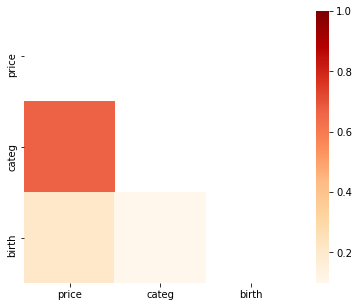

In [49]:
corr = df_final.corr()

mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(7, 5))

ax = sns.heatmap(corr, mask=mask, vmax=1, square=True, cmap="OrRd")

La DF est maintenant prête pour les analyses sur le CA et les clients !

In [50]:
df_times=df_final.copy()

In [51]:
df_times.dtypes

id_prod        object
price         float64
categ         float64
date           object
session_id     object
client_id      object
sex            object
birth         float64
dtype: object

Je vais maintenant regarder le CA par années, mais je remarque que la colone "date" n'est pas bien typer. Je vais donc, retirer les NaN et convertir sous un format adéquat à l'analyse.

In [52]:
df_times['date']=pd.to_datetime(df_times['date'])
# df1.dtypes
print("Nombre de NA dans la colone date :",df_times['date'].isna().sum())
print(df_times.shape)

Nombre de NA dans la colone date : 42
(679153, 8)


In [53]:
df_times=df_times[df_times.date.notnull()]
df_times.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991.0
1,0_1421,19.99,0.0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991.0
2,0_2131,8.99,0.0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991.0
3,0_1635,16.99,0.0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991.0
4,0_166,1.83,0.0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991.0


In [54]:
df_by_year= df_times.copy()
df_by_year['date']=df_by_year['date'].dt.year
df_by_year['date'].head()

0    2022
1    2022
2    2021
3    2021
4    2021
Name: date, dtype: int64

<AxesSubplot:>

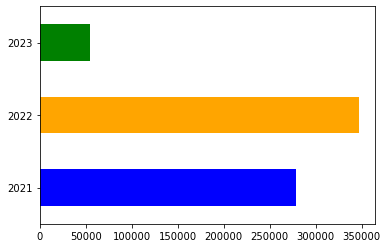

In [55]:
colors=["blue", 'orange', 'green']
df_by_year['date'].value_counts().sort_index().plot(kind='barh', color=colors)

On remarque un nombre plus important de ventes lors de l'année 2022. De plus on constate que la base de données ne comprend que 3 années : 2021, 2022 et 2023.
Nous allons maintenant analayser les prix des ventes effectuer lors de ses 3 années.

In [56]:
df_times.describe()


,price,categ,birth
count,679111.000000,679111.000000,679111.000000
mean,17.454773,0.441953,1977.811149
std,18.328998,0.595042,13.575361
min,0.620000,0.000000,1929.000000
25%,8.870000,0.000000,1970.000000
50%,13.990000,0.000000,1980.000000
75%,18.990000,1.000000,1987.000000
max,300.000000,2.000000,2004.000000


Le prix min et max me semble correct, il ne s'agit pas de valeur absurde selon moi.
Je continue donc l'analyse sans supprimer de données.

In [57]:
df_price_by_year = df_times.copy()
df_price_by_year['date']=pd.to_datetime(df_price_by_year['date']).dt.date
df_price_by_year.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0.0,2022-02-20,s_168213,c_6389,f,1991.0
1,0_1421,19.99,0.0,2022-10-20,s_285450,c_6389,f,1991.0
2,0_2131,8.99,0.0,2021-10-09,s_102458,c_6389,f,1991.0
3,0_1635,16.99,0.0,2021-04-28,s_26841,c_6389,f,1991.0
4,0_166,1.83,0.0,2021-07-15,s_62585,c_6389,f,1991.0


In [58]:
df_price_by_year=df_price_by_year.set_index('date')
df_price_by_year

,id_prod,price,categ,session_id,client_id,sex,birth
date,,,,,,,
2022-02-20,0_1421,19.99,0.0,s_168213,c_6389,f,1991.0
2022-10-20,0_1421,19.99,0.0,s_285450,c_6389,f,1991.0
2021-10-09,0_2131,8.99,0.0,s_102458,c_6389,f,1991.0
2021-04-28,0_1635,16.99,0.0,s_26841,c_6389,f,1991.0
2021-07-15,0_166,1.83,0.0,s_62585,c_6389,f,1991.0
...,...,...,...,...,...,...,...
2022-01-28,2_163,68.99,2.0,s_156517,c_7739,m,1997.0
2021-07-21,2_101,63.99,2.0,s_65192,c_7089,m,2002.0
2022-12-21,2_101,63.99,2.0,s_315267,c_7089,m,2002.0


In [59]:
df_price_by_year.index = pd.to_datetime(df_price_by_year.index)
df_price_by_year.index

DatetimeIndex(['2022-02-20', '2022-10-20', '2021-10-09', '2021-04-28',
               '2021-07-15', '2022-10-15', '2021-06-15', '2023-02-10',
               '2023-01-29', '2021-07-10',
               ...
               '2022-10-05', '2021-08-05', '2021-09-05', '2022-10-28',
               '2022-08-28', '2022-01-28', '2021-07-21', '2022-12-21',
               '2022-10-21', '2022-03-21'],
              dtype='datetime64[ns]', name='date', length=679111, freq=None)

In [60]:
def graphMeanPriceByYear(df ,year):
    plt.figure(figsize=(20,8))
    df.loc[year, 'price'].resample('D').mean().plot(label='moyenne par jours', alpha=0.5)
    df.loc[year, 'price'].resample('M').mean().plot(label='moyenne par mois', lw=3, ls=":", alpha=0.8)
    df.loc[year, 'price'].resample('W').mean().plot(label='moyenne par semaines', lw=2, ls="--", alpha=0.8)
    plt.legend()
    plt.title("Moyenne du prix de ventes pour l'année" + " "+ year, fontsize=20)
    plt.show()

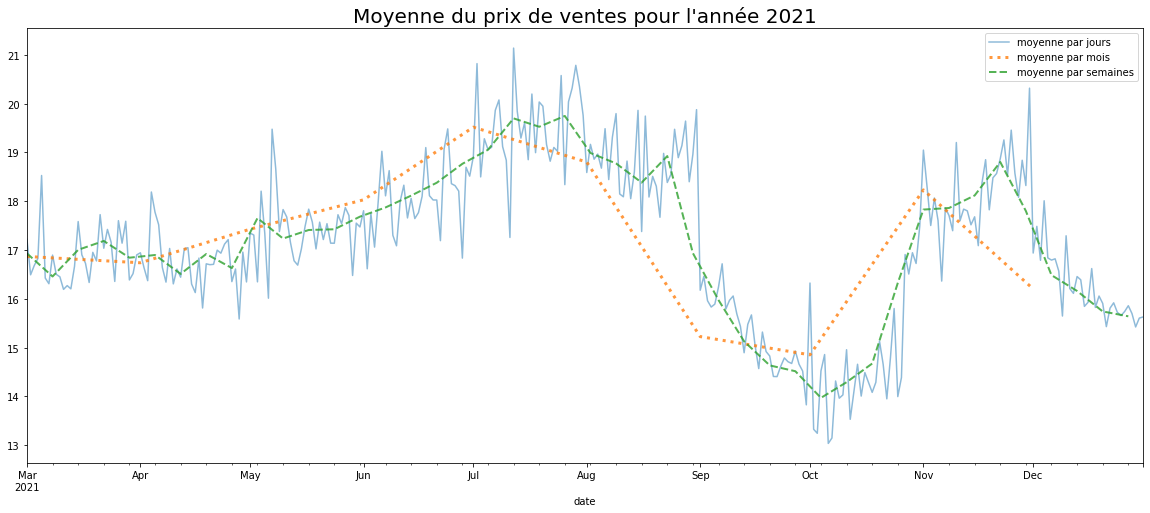

In [61]:
graphMeanPriceByYear(df_price_by_year ,"2021")

On remarque une forte chute du chiffre d'affaire pour les moi de septembre jusqu'à novembre. Il serait intéressant de voir si nous avons des élements nous permettant de comprendre ce phénomène.

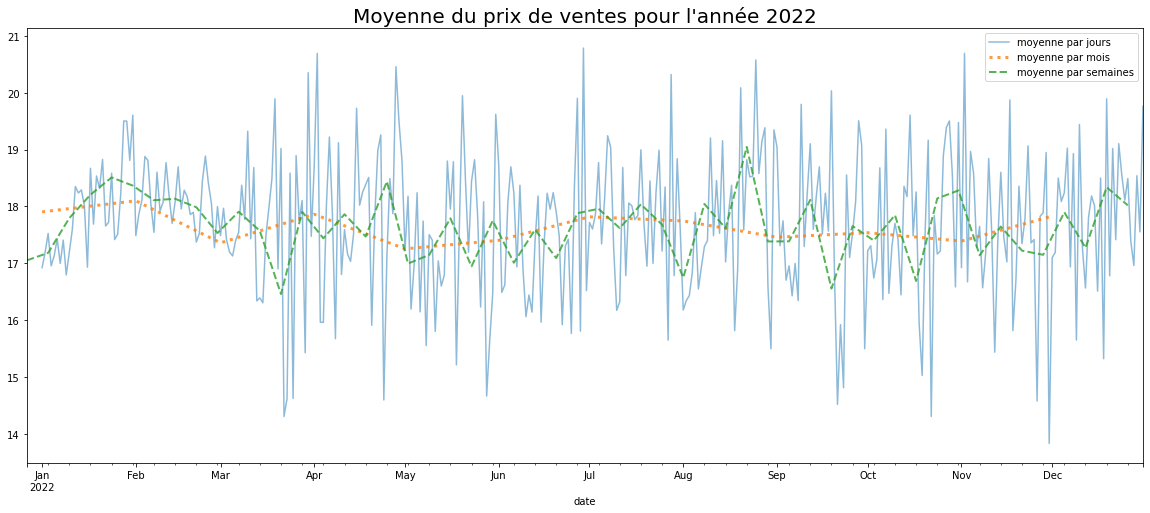

In [62]:
graphMeanPriceByYear(df_price_by_year ,"2022")

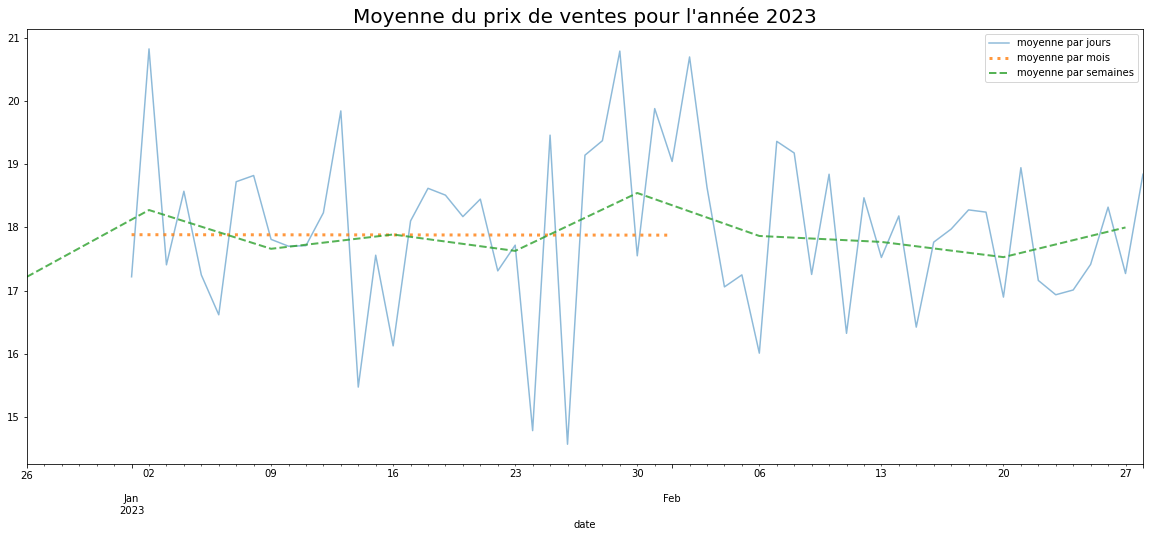

In [63]:
graphMeanPriceByYear(df_price_by_year , "2023")

In [64]:
df_explo_2021_10=df_price_by_year.loc['2021-10']
df_explo_2021_10.describe()

,price,categ,birth
count,21599.000000,21599.000000,21599.000000
mean,14.852481,0.185564,1978.863790
std,17.780353,0.509483,12.245905
min,0.620000,0.000000,1929.000000
25%,6.990000,0.000000,1973.000000
50%,11.030000,0.000000,1980.000000
75%,15.990000,0.000000,1987.000000
max,247.220000,2.000000,2004.000000


On constate une forte chute au niveau de "categ", il faut analyse le ratio de ventes des livres de categ 0, 1 et 2 vendu lors de ce mois d'octobre pour essayer de comprendre ce soucis.

In [65]:
df_explo_2021_10.groupby('categ')['price'].agg(['mean', 'count', 'min', 'max'])

,mean,count,min,max
categ,,,,
0.0,10.619914,18762,0.62,39.99
1.0,20.265498,1666,3.29,64.59
2.0,74.966345,1171,30.99,247.22


In [66]:
df_explo_2021=df_price_by_year.loc['2021']
df_explo_2021.groupby('categ')['price'].agg(['mean', 'count', 'min', 'max'])

,mean,count,min,max
categ,,,,
0.0,10.639495,176984,0.62,40.99
1.0,20.503665,86716,2.00,80.99
2.0,76.286105,14548,30.99,300.00


In [67]:
a=df_final['price']

bins = pd.IntervalIndex.from_tuples([(0, 5), (5, 10), (10, 15), (15, 20),(20, 30), (30, 50), (50, 100), (100, 150), (150, 350)])
a_price = pd.cut(a, bins).value_counts().sort_index()
a_price


(0, 5]         74099
(5, 10]       141789
(10, 15]      166835
(15, 20]      151752
(20, 30]       99260
(30, 50]       13667
(50, 100]      24794
(100, 150]      4262
(150, 350]      2674
Name: price, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

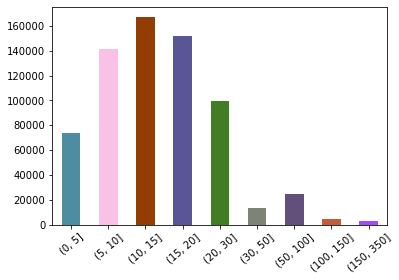

In [68]:
colors = ['#4E8CA1', '#F9C1E7', '#933D05', '#595697', '#417D22', '#7D8377', '#624F7B', '#C25D39', '#A24AFD', '#2AED9E']
a_price.plot(kind='bar', color=colors)
plt.xticks(rotation=40)
plt.show

In [69]:
b_price=df_final['price']
b_categ=df_final['categ']

bins = pd.IntervalIndex.from_tuples([(0, 5), (5, 10), (10, 15), (15, 20),(20, 30), (30, 50), (50, 100), (100, 150), (150, 350)])
b_price = pd.cut(b_price, bins)

In [70]:
b_result = pd.concat([b_price, b_categ], axis=1).dropna()

In [71]:
b_result.head()

,price,categ
0,"(15, 20]",0.0
1,"(15, 20]",0.0
2,"(5, 10]",0.0
3,"(15, 20]",0.0
4,"(0, 5]",0.0


In [72]:
plot_b = b_result.groupby([pd.Grouper(key='categ'), 'price']).size().reset_index()
plot_b=pd.pivot_table(plot_b, columns='categ', index='price')

In [73]:
# création de la fonction créant les graphiques à barres cumulées
def createStackedBar(data, title, format=False) : 
    figure, axes = plt.subplots(1, 1)
    data.plot(kind='bar', stacked=True, ax=axes)
    figure.set_size_inches(6.5, 4.5, forward=True)
    figure.set_dpi(100)
    fig = plt.gcf() 
    fig.suptitle(title, fontsize=14)
    plt.show
    if format :
        axes.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
    plt.xticks(rotation=70)
    plt.legend(loc="upper center", bbox_to_anchor=(1.3, 0.8), ncol=2,  title="Catégories",)

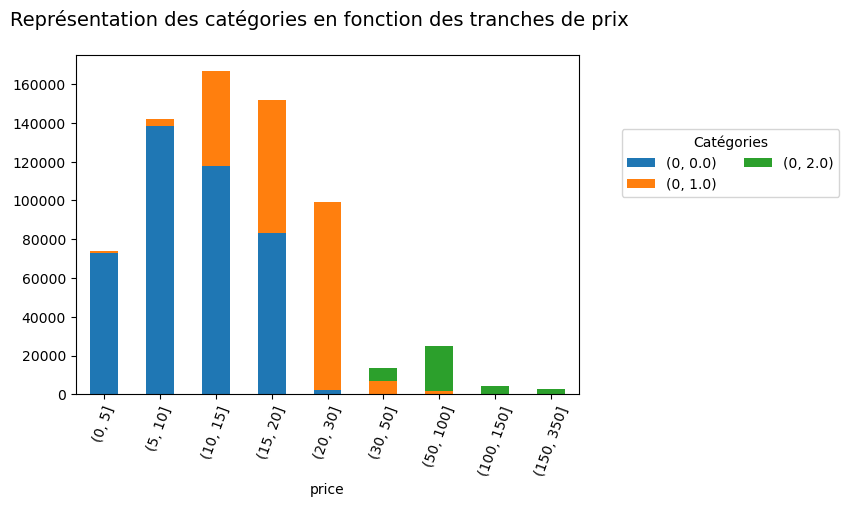

In [74]:
createStackedBar(plot_b, 'Représentation des catégories en fonction des tranches de prix')

In [75]:
data1=df_explo_2021_10.groupby('categ')['price'].count()
data2=df_explo_2021.groupby('categ')['price'].count()
def createPie(data, title):
    labels = ['Catégorie 0', 'Catégorie 1', 'Catégorie 2']
    colors = sns.color_palette('bright')
    plt.figure().patch.set_facecolor("w")
    plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
    plt.title(title, fontsize=20)
    plt.show()

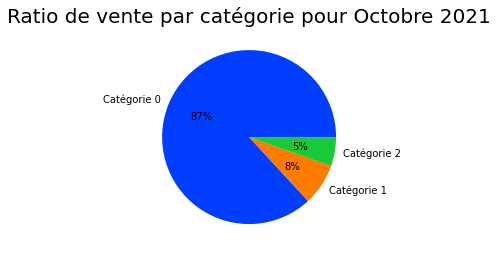

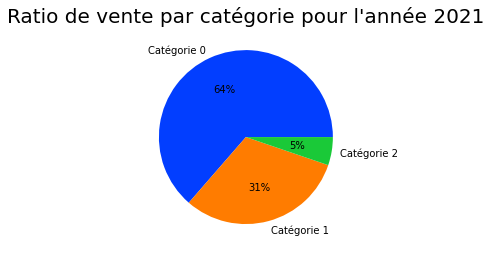

In [76]:
createPie(data1, "Ratio de vente par catégorie pour Octobre 2021")
createPie(data2, "Ratio de vente par catégorie pour l'année 2021")

In [77]:
df_explo_2021

,id_prod,price,categ,session_id,client_id,sex,birth
date,,,,,,,
2021-10-09,0_2131,8.99,0.0,s_102458,c_6389,f,1991.0
2021-04-28,0_1635,16.99,0.0,s_26841,c_6389,f,1991.0
2021-07-15,0_166,1.83,0.0,s_62585,c_6389,f,1991.0
2021-06-15,1_279,27.99,1.0,s_48812,c_6389,f,1991.0
2021-07-10,0_1545,18.99,0.0,s_60493,c_6389,f,1991.0
...,...,...,...,...,...,...,...
2021-05-22,1_278,19.18,1.0,s_38163,c_1970,m,2002.0
2021-09-25,0_142,19.85,0.0,s_95415,c_1232,f,1960.0
2021-08-05,2_181,57.99,2.0,s_71886,c_6837,f,1995.0


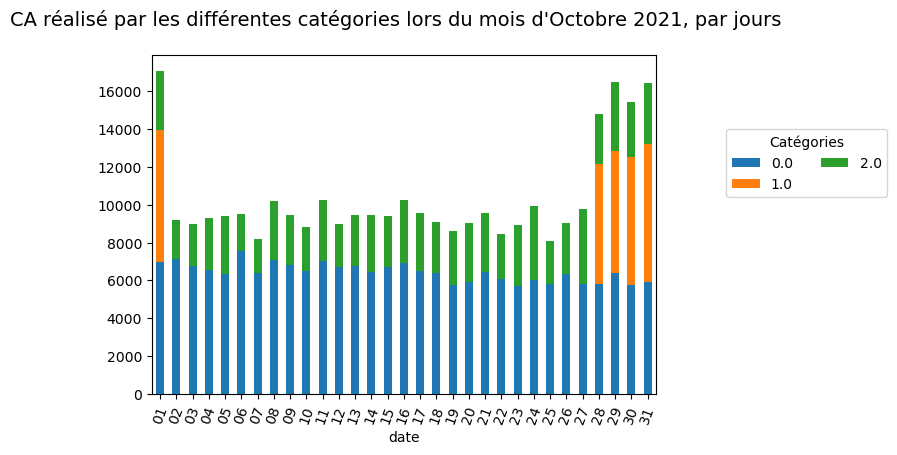

In [78]:
# création des datas pour réaliser le graphique consernant le mois d'Octobre 2021
data3=df_price_by_year.loc['2021-10'].reset_index()
data3=data3.groupby(['categ', 'date'])['price'].sum().unstack("categ").fillna(0)
data3.head()

#création du graphique
createStackedBar(data3, "CA réalisé par les différentes catégories lors du mois d'Octobre 2021, par jours", True)

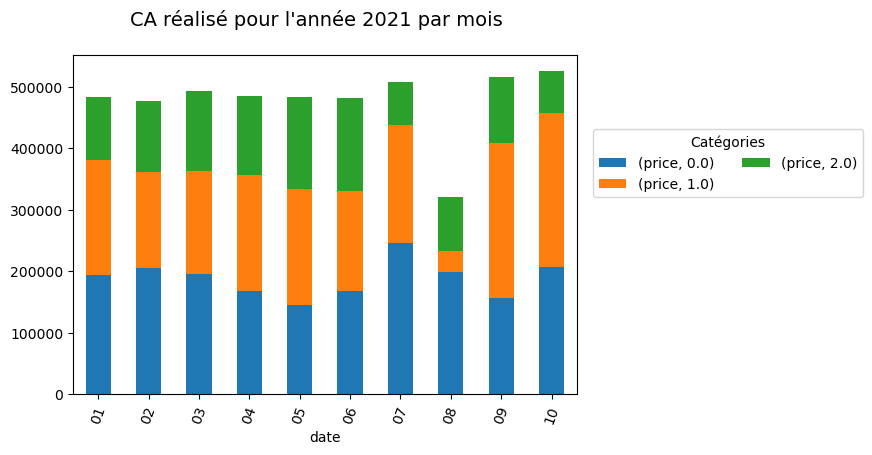

In [79]:
# création des datas pour réaliser le graphique consernant l'année 2021
data4=df_price_by_year.loc['2021'].reset_index()
lst_drop= ['id_prod', 'session_id', 'client_id', 'sex', 'birth']
data4=data4.drop(lst_drop, axis=1)
plot_df = data4.groupby([pd.Grouper(key='date', freq='M'), 'categ']).sum().unstack(fill_value=0)

#création du graphique
createStackedBar(plot_df, "CA réalisé pour l'année 2021 par mois", True)

On confirme le fait que le ratio de livre vendu pour la catégorie 0 (les livres avec le moins de valeurs) est beaucoup plus haut que pour le reste de l'année. La catégories 1 c'est très peu vendu pour ce mois d'octobre, en plus d'avoir une valeur max également inférieur à la normal. La catégories 2 ne semble pas avoir de soucis particulier.

In [80]:
df_explo_cat1_oct_2021 = df_explo_2021_10[df_explo_2021_10['categ'] == 1.0]
df_explo_cat1_oct_2021.head()

,id_prod,price,categ,session_id,client_id,sex,birth
date,,,,,,,
2021-10-29,1_727,16.99,1.0,s_111690,c_6389,f,1991.0
2021-10-01,1_412,16.65,1.0,s_98357,c_6389,f,1991.0
2021-10-30,1_656,6.62,1.0,s_112144,c_3544,f,1967.0
2021-10-30,1_381,15.99,1.0,s_112087,c_5362,f,1980.0
2021-10-31,1_414,23.83,1.0,s_112862,c_3091,m,1977.0


On constate une absence de données concernant la catégories 1 du 2 Octobres jusqu'au 28 Octobre. Est une absence total en rayon de cette catégorie de livre, et donc un problême de stock ? Ou alors notre base de donnée n'est pas complète ?

Nous n'avons pas d'avantage de moyen de le savoir dans cette analyse.

In [81]:
df_final.corr()

,price,categ,birth
price,1.000000,0.671729,0.209465
categ,0.671729,1.000000,0.099241
birth,0.209465,0.099241,1.000000


Il existe une corrélation entre le prix et la categ d'un produit.

In [82]:
def graphCAByYear(df ,year):
    plt.figure(figsize=(20,8))
    df.loc[year, 'price'].resample('D').sum().plot(label='CA par jours', alpha=0.5)
    df.loc[year, 'price'].resample('M').sum().plot(label='CA par mois', lw=3, ls=":", alpha=0.8)
    df.loc[year, 'price'].resample('W').sum().plot(label='CA par semaines', lw=2, ls="--", alpha=0.8)
    plt.legend()
    plt.title("Moyenne du CA des ventes pour l'année" + " "+ year, fontsize=20)
    plt.show()

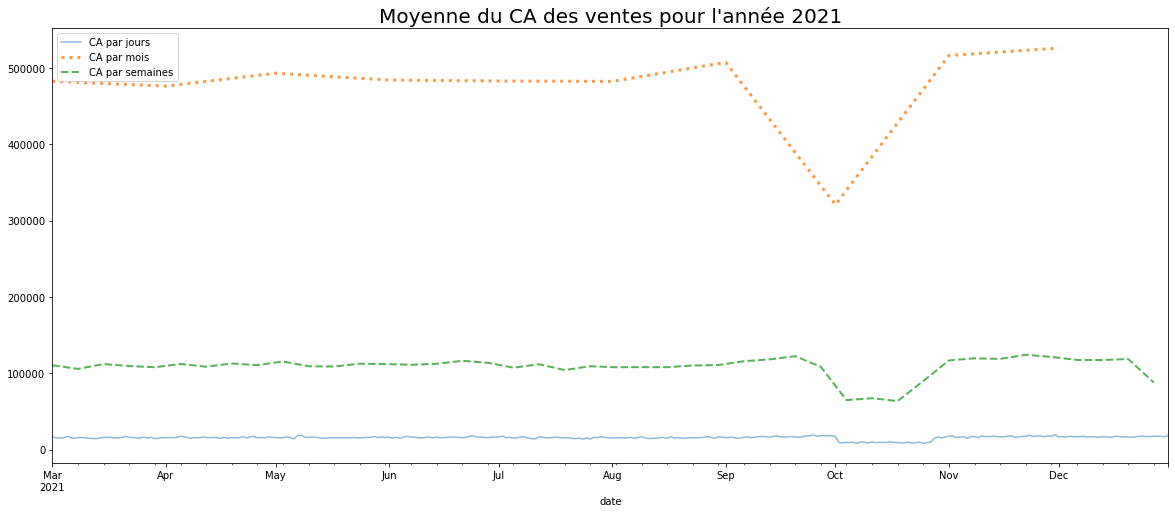

In [83]:
graphCAByYear(df_price_by_year, "2021")

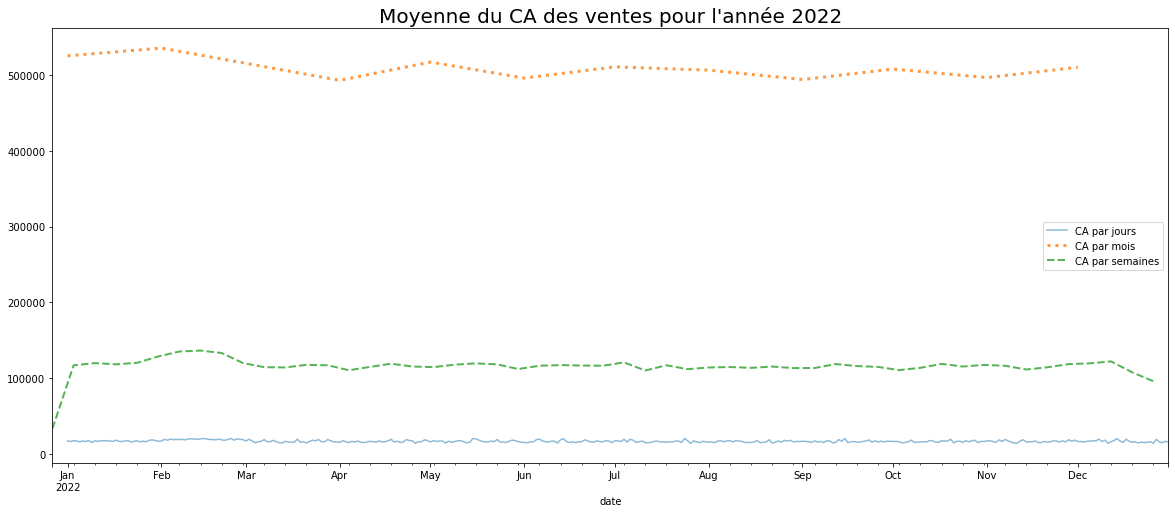

In [84]:
graphCAByYear(df_price_by_year, "2022")

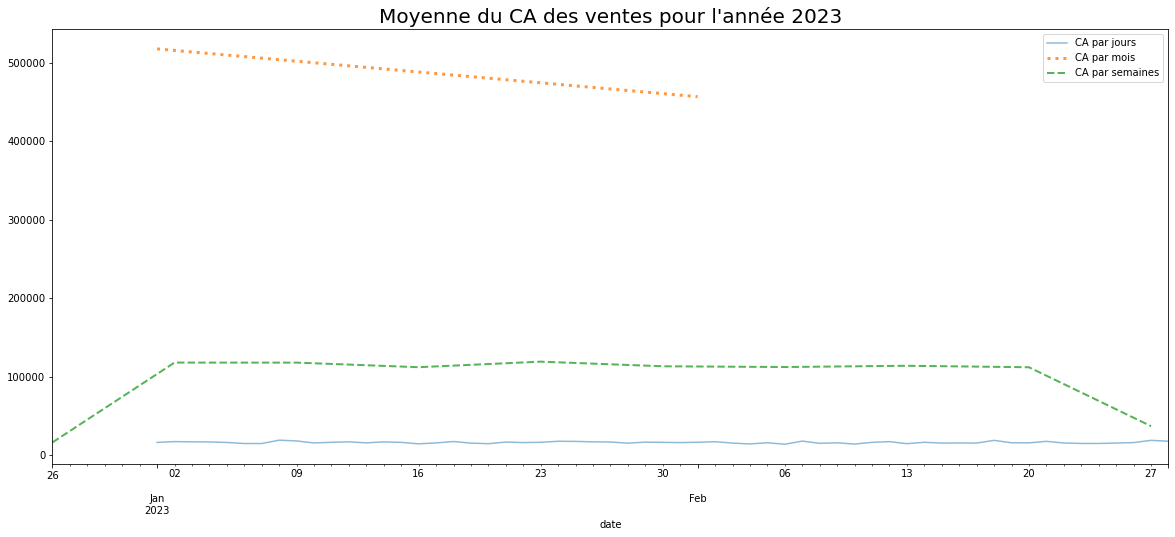

In [85]:
graphCAByYear(df_price_by_year, "2023")

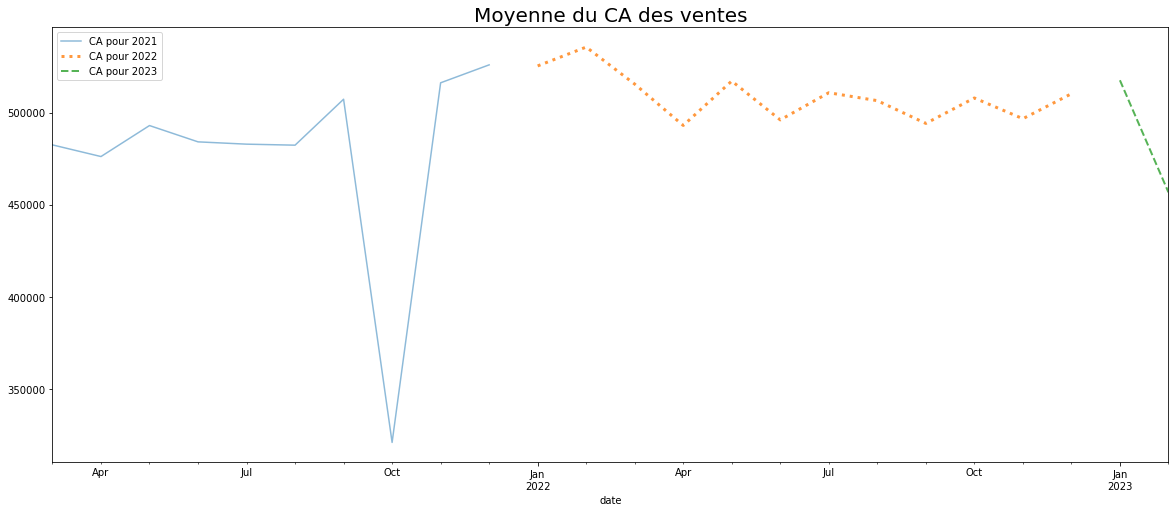

In [86]:

plt.figure(figsize=(20,8))
df_price_by_year.loc["2021", 'price'].resample('M').sum().plot(label='CA pour 2021', alpha=0.5)
df_price_by_year.loc["2022", 'price'].resample('M').sum().plot(label='CA pour 2022', lw=3, ls=":", alpha=0.8)
df_price_by_year.loc["2023", 'price'].resample('M').sum().plot(label='CA pour 2023', lw=2, ls="--", alpha=0.8)
plt.legend()
plt.title("Moyenne du CA des ventes" , fontsize=20)
plt.show()

Hormis la chute de CA lié à l'asbence partielle de données du mois d'Octobre 2021, le CA semble avoir une légère progression.

Nous allons donc effectuer une comparaison plus poussé du CA entre 2021 et 2022.

Pour réaliser une comparaison pertinente entre 2021 et 2022, je décide de supprimer les mois de janvier & février 2022, ainsi que les mois d'octobre des deux années.

In [87]:
d1=df_price_by_year.loc['2021', 'price'].resample('M').sum().reset_index().drop("date", axis=1).rename(columns={'price': '2021'})
d2=df_price_by_year.loc['2022', 'price'].resample('M').sum().reset_index().drop("date", axis=1).rename(columns={'price': '2022'})
d1.drop(d1.index[7], inplace=True)
d2.drop(d2.index[[0,1,9]], inplace=True)

In [88]:
d1=d1.reset_index().drop("index", axis=1)
d2=d2.reset_index().drop("index", axis=1)

In [89]:
result = pd.concat([d1, d2], axis=1)
result

,2021,2022
0,482440.61,515456.53
1,476109.30,492998.94
2,492943.47,517132.60
3,484088.56,496016.12
4,482835.40,510783.12
5,482284.79,506467.27
6,507240.68,494114.53
7,516167.73,496664.94
8,525917.28,510219.50


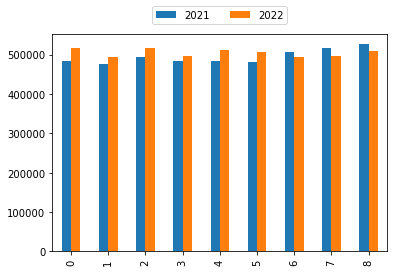

In [90]:
result.plot(kind='bar')
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=2)

In [91]:
result["evolution 2022 / 2021"] = ((result["2022"]*100) / result["2021"])-100
result

,2021,2022,evolution 2022 / 2021
0,482440.61,515456.53,6.843520
1,476109.30,492998.94,3.547429
2,492943.47,517132.60,4.907080
3,484088.56,496016.12,2.463921
4,482835.40,510783.12,5.788250
5,482284.79,506467.27,5.014149
6,507240.68,494114.53,-2.587756
7,516167.73,496664.94,-3.778382
8,525917.28,510219.50,-2.984838


<AxesSubplot:>

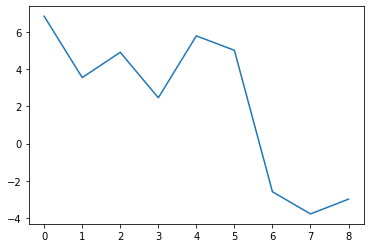

In [92]:
result["evolution 2022 / 2021"].plot()

On remarque le CA de l'année 2021 à été en progression : l'année à mieux fini qu'elle n'a commencé. A l'inversé, malgrè cette bonne dynamique l'année 2022 à légèrement baisser.
Cependant, le CA reste globalement le même étant donné le faible niveau de variable.

Nous allons maintenant faire l'analyse des clients.

In [93]:
df_final.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991.0
1,0_1421,19.99,0.0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991.0
2,0_2131,8.99,0.0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991.0
3,0_1635,16.99,0.0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991.0
4,0_166,1.83,0.0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991.0


In [94]:
df_final['sex'].value_counts()

m    340836
f    338296
Name: sex, dtype: int64

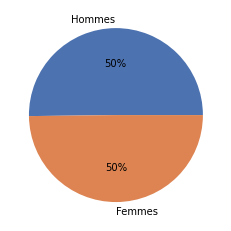

In [95]:
colors = sns.color_palette('deep')
labels= ['Hommes', 'Femmes']

plt.pie(df_final['sex'].value_counts(),labels=labels, colors = colors, autopct='%.0f%%')
plt.show()

<AxesSubplot:xlabel='sex'>

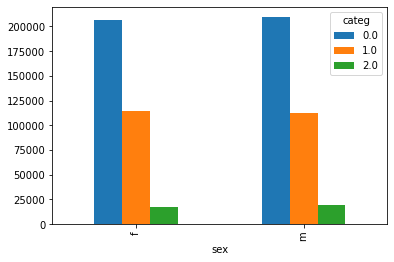

In [96]:
res_to_plot =df_final.groupby(['sex', 'categ'])['categ'].size().unstack()
res_to_plot.plot(kind='bar')

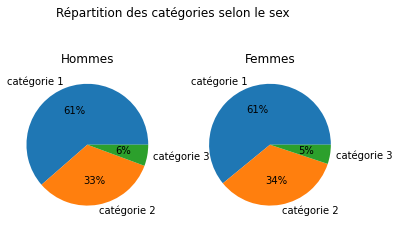

In [97]:
labels=["catégorie 1", "catégorie 2", "catégorie 3"]
figure, axes = plt.subplots(1,2)
axes[0].pie(res_to_plot.loc["m"], labels=labels, autopct='%.0f%%' )
axes[1].pie(res_to_plot.loc["f"], labels=labels, autopct='%.0f%%' )
figure.suptitle('Répartition des catégories selon le sex')
axes[0].title.set_text("Hommes")
axes[1].title.set_text("Femmes")

plt.show()

Nous remarquons qu'il existe une quasi parfaite équité entre les hommes et les femmes. Tant sur leurs présences, que sur leurs modes d'achats (catégories).

In [98]:
res_to_plot

categ,0.0,1.0,2.0
sex,,,
f,206103,114899,17283
m,209356,112270,19200


In [99]:

print(res_to_plot)
print("---------------------")
stat, p, dof, expected = chi2_contingency(res_to_plot) 
  
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)')

categ     0.0     1.0    2.0
sex                         
f      206103  114899  17283
m      209356  112270  19200
---------------------
p value is 1.1310980597090762e-32
Dependent (reject H0)


In [100]:
df_age=df_final.copy()
df_age.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991.0
1,0_1421,19.99,0.0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991.0
2,0_2131,8.99,0.0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991.0
3,0_1635,16.99,0.0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991.0
4,0_166,1.83,0.0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991.0


In [101]:
df_age['date']=pd.to_datetime(df_age['date']).dt.date
df_age.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0.0,2022-02-20,s_168213,c_6389,f,1991.0
1,0_1421,19.99,0.0,2022-10-20,s_285450,c_6389,f,1991.0
2,0_2131,8.99,0.0,2021-10-09,s_102458,c_6389,f,1991.0
3,0_1635,16.99,0.0,2021-04-28,s_26841,c_6389,f,1991.0
4,0_166,1.83,0.0,2021-07-15,s_62585,c_6389,f,1991.0


In [102]:
df_age.dropna(inplace=True)

In [103]:
df_age['birth']=df_age['birth'].astype(int)
df_age["age"]=2021 - df_age["birth"]
df_age=df_age.drop('birth', axis=1)

Pour analyser la répartition des ages par sex, je vais reprendre une des df initialement clean.

In [104]:
df_age_per_client=df_age.drop_duplicates(subset=['client_id'])

In [105]:
lst_drop= ['id_prod', 'price', 'categ', 'date', 'session_id', 'client_id']
df_age_per_client=df_age_per_client.drop(lst_drop, axis=1)

In [106]:
df_age_per_client['age'].value_counts()

17    437
42    215
33    207
35    203
43    199
     ... 
88      8
89      6
90      4
91      4
92      3
Name: age, Length: 76, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

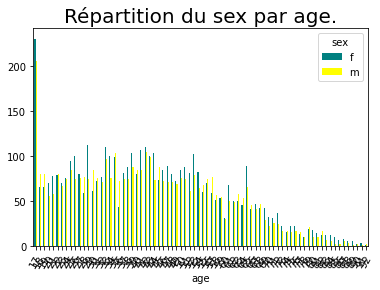

In [107]:
pd.crosstab(df_age_per_client['age'],df_age_per_client['sex']).plot(kind='bar', color = ['teal', 'yellow']).set_title('Répartition du sex par age.', fontsize=20)
plt.xticks(rotation=60)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

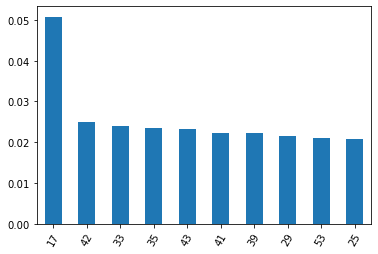

In [108]:
df_age_per_client['age'].value_counts(normalize=True).head(10).plot(kind='bar')
plt.xticks(rotation=60)
plt.show

Les clients agés de 17 ans sont les plus représenté dans notre base de données, avec 0.05% de présence. Ensuite, nous retrouvons les clients de 42 ans (~0.25) et 33 (~0.25) entres autres.


In [109]:
df_age_per_client = df_age.groupby([pd.Grouper(key='sex'), 'age']).size().reset_index().rename(columns={0: 'count'})
print(df_age_per_client.shape)
print('-------')
df_age_per_client.head()

(152, 3)
-------


,sex,age,count
0,f,17,7901
1,f,18,2003
2,f,19,1915
3,f,20,2474
4,f,21,2583


In [113]:
age_price_corr = df_age.groupby('age').agg(['mean', 'count', 'sum', 'min', 'max']).reset_index()
age_price_corr

age      price                                     categ                  \
             mean  count        sum   min     max      mean  count      sum   
0   17  40.201577  15149  609013.69  0.97  254.44  1.171232  15149  17743.0   
1   18  40.767737   4371  178195.78  0.81  236.99  1.200183   4371   5246.0   
2   19  40.178305   4584  184177.35  2.24  247.22  1.180846   4584   5413.0   
3   20  41.979704   4252  178497.70  2.99  300.00  1.177328   4252   5006.0   
4   21  37.391339   4413  165007.98  1.67  247.22  1.126218   4413   4970.0   
..  ..        ...    ...        ...   ...     ...       ...    ...      ...   
71  88  16.117638    326    5254.35  3.02   49.61  0.567485    326    185.0   
72  89  16.216045    311    5043.19  3.02   61.23  0.581994    311    181.0   
73  90  16.561471    170    2815.45  3.99   46.99  0.558824    170     95.0   
74  91  17.760487    226    4013.87  2.35   62.99  0.676991    226    153.0   
75  92  16.029104    201    3221.85  2.99  145.99  0.616915    201    124.0   

              
    min  max  
0   0.0  2.0  
1   0.0  2.0  
2   0.0  2.0  
3   0.0  2.0  
4   0.0  2.0  
..  ...  ...  
71  0.0  2.0  
72  0.0  2.0  
73  0.0  2.0  
74  0.0  2.0  
75  0.0  2.0  

[76 rows x 11 columns]

In [114]:
age_price_corr.corr()

age     price                                          \
                           mean     count       sum       min       max   
age          1.000000 -0.547861 -0.533734 -0.778881  0.568089 -0.749552   
price mean  -0.547861  1.000000 -0.267318  0.249629  0.040303  0.511998   
      count -0.533734 -0.267318  1.000000  0.830299 -0.610501  0.308825   
      sum   -0.778881  0.249629  0.830299  1.000000 -0.598327  0.566832   
      min    0.568089  0.040303 -0.610501 -0.598327  1.000000 -0.510477   
      max   -0.749552  0.511998  0.308825  0.566832 -0.510477  1.000000   
categ mean  -0.294950  0.947001 -0.506937  0.005556  0.193117  0.352911   
      count -0.533734 -0.267318  1.000000  0.830299 -0.610501  0.308825   
      sum   -0.765406  0.468661  0.580319  0.917061 -0.537276  0.648904   
      min         NaN       NaN       NaN       NaN       NaN       NaN   
      max         NaN       NaN       NaN       NaN       NaN       NaN   

                categ                              
                 mean     count       sum min max  
age         -0.294950 -0.533734 -0.765406 NaN NaN  
price mean   0.947001 -0.267318  0.468661 NaN NaN  
      count -0.506937  1.000000  0.580319 NaN NaN  
      sum    0.005556  0.830299  0.917061 NaN NaN  
      min    0.193117 -0.610501 -0.537276 NaN NaN  
      max    0.352911  0.308825  0.648904 NaN NaN  
categ mean   1.000000 -0.506937  0.298952 NaN NaN  
      count -0.506937  1.000000  0.580319 NaN NaN  
      sum    0.298952  0.580319  1.000000 NaN NaN  
      min         NaN       NaN       NaN NaN NaN  
      max         NaN       NaN       NaN NaN NaN

<function matplotlib.pyplot.show(close=None, block=None)>

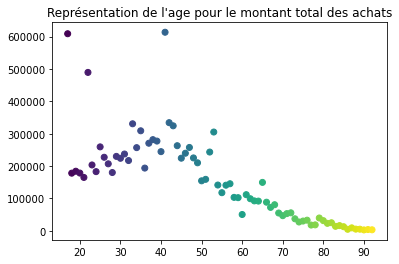

In [122]:
t = np.arange(76)
plt.scatter(age_price_corr['age'], age_price_corr[('price', 'sum')], c=t)
plt.title("Représentation de l'age pour le montant total des achats" )
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

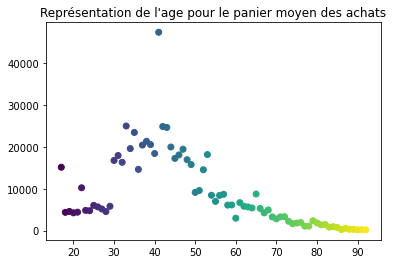

In [120]:

plt.scatter(age_price_corr['age'], age_price_corr[('price','count')], c=t)
plt.title("Représentation de l'age pour le panier moyen des achats" )
plt.show

In [ ]:
#TODO Analyse de la corrélation entre l'âge clients et la catégorie produits 
# print ("Logarithm base 10 of 76 is : ", end="")
# print (math.log(76,10))

Logarithm base 10 of 76 is : 1.8808135922807911


(76, 3)
-------


,sex,age,count
36,f,53,14013
16,f,33,13032
27,f,44,12287
26,f,43,12235
25,f,42,11966


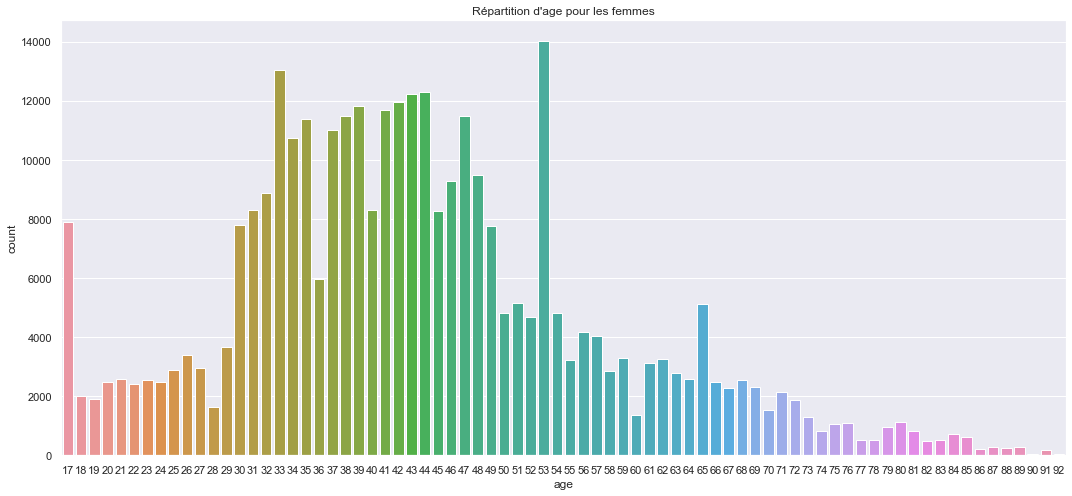

In [123]:
age_for_f = df_age_per_client[df_age_per_client['sex']=='f'].sort_values(by='count', ascending=False)
sns.set(rc={'figure.figsize':(18,8)})
sns.barplot(data=age_for_f, x="age", y='count').set_title("Répartition d'age pour les femmes")
print(age_for_f.shape)
print('-------')
age_for_f.head()

(76, 3)
-------


,sex,age,count
100,m,41,35719
101,m,42,12912
102,m,43,12424
94,m,35,12073
92,m,33,11968


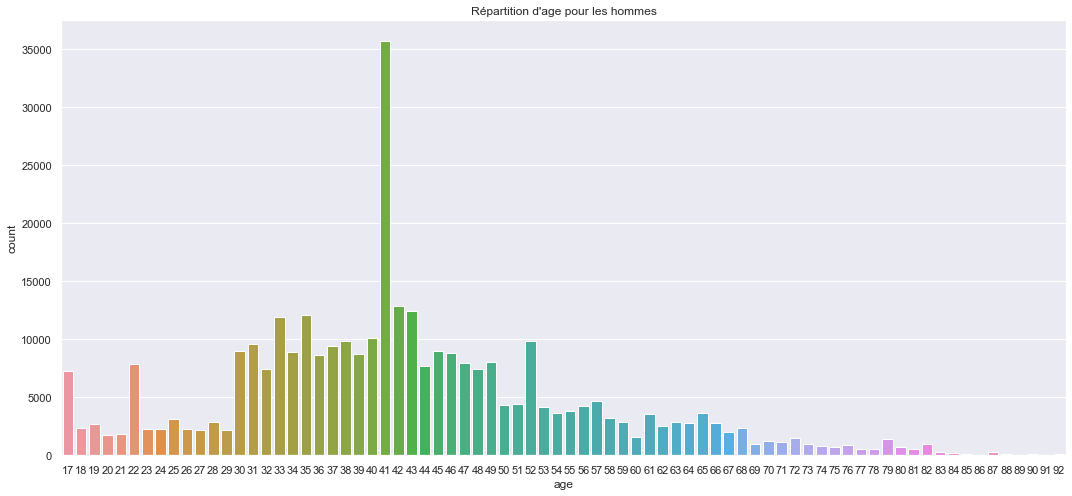

In [124]:
age_for_m = df_age_per_client[df_age_per_client['sex']=='m'].sort_values(by='count', ascending=False)
sns.set(rc={'figure.figsize':(18,8)})
sns.barplot(data=age_for_m, x="age", y='count').set_title("Répartition d'age pour les hommes")
print(age_for_m.shape)
print('-------')
age_for_m.head()

In [125]:
age = df_age['age'].sort_values().values
def gini(data):
    n = len(data)
    lorenz = np.cumsum(np.sort(data)) / data.sum()
    lorenz = np.append([0],lorenz)
    AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n
    S = 0.5 - AUC
    gini = 2*S
    return gini

gini(age)

0.1739286635417432

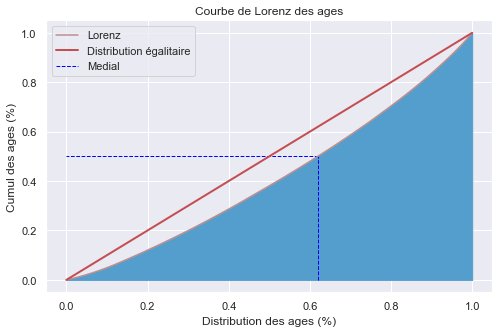

In [126]:
def lorenz(data, title, label):    
    lorenz_data = np.cumsum(data) / data.sum() 
    med = 1 - round(statistics.median(lorenz_data), 2)
    plt.figure(figsize=(8,5))
    plt.plot(np.linspace(0,1,len(lorenz_data)), lorenz_data, drawstyle='steps-post', color='rosybrown', label='Lorenz')
    plt.fill_between(np.linspace(0,1,len(lorenz_data)) ,lorenz_data , color='#539ecd')
    plt.plot([0, 1], [0, 1], 'r-', lw=2, label='Distribution égalitaire')
    plt.vlines(x=med, ymin=0, ymax=.5, color='blue', linestyle='--', linewidth=1, label='Medial')
    plt.hlines(xmin=med, xmax=0, y=.5, color='blue', linestyle='--', linewidth=1)
    plt.title(title)
    plt.xlabel("Distribution des " + label + " (%)")
    plt.ylabel("Cumul des " + label + " (%)")
    plt.legend(loc="best")
    plt.show()

lorenz(age, 'Courbe de Lorenz des ages', "ages")

On constate qu'environ 62% des âges clients représentent 50% du total des âges. C'est une égalité quasi parfaite, ce que confirme avec l'indice de Gini avec une valeur de 0.17.

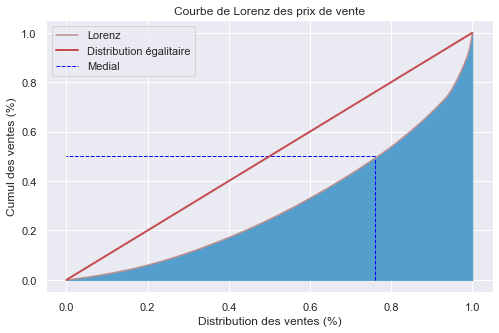

0.39547021795694925


In [127]:
price = df_price_by_year['price'].sort_values().values

lorenz(price, 'Courbe de Lorenz des prix de vente', "ventes")
print(gini(price))

On constate que 76% des ventes représentent 50% du montant total des prix de vente. Ce n'est pas une égalité totale, mais acceptable dans notre contexte business. L'indice de Gini nous donne 0.39.

In [128]:
print(df_final['client_id'].describe())
print("-----------------------")
print(df_final['client_id'].value_counts().head(10))

count     679132
unique      8621
top       c_1609
freq       25488
Name: client_id, dtype: object
-----------------------
c_1609    25488
c_6714     9181
c_3454     6770
c_4958     5195
c_3263      403
c_2140      402
c_2595      398
c_2077      384
c_1637      380
c_7421      379
Name: client_id, dtype: int64


Il semble y avoir 4 "gros" clients en comparaison du reste. Je vais étudier ça de plus prêt.

In [129]:
df_final.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991.0
1,0_1421,19.99,0.0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991.0
2,0_2131,8.99,0.0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991.0
3,0_1635,16.99,0.0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991.0
4,0_166,1.83,0.0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991.0


In [131]:
df_clients = df_final.copy()
df_clients.dropna(inplace=True)

In [132]:
best_clients = df_clients[['price', 'client_id', 'birth']]
best_clients.head()

,price,client_id,birth
0,19.99,c_6389,1991.0
1,19.99,c_6389,1991.0
2,8.99,c_6389,1991.0
3,16.99,c_6389,1991.0
4,1.83,c_6389,1991.0


In [133]:
best_clients= best_clients.groupby('client_id').agg(['mean', 'count', 'min', 'max']).sort_values([('price', 'count')], ascending=False)

best_clients.head()

price                        birth                       
                mean  count   min     max    mean  count     min     max
client_id                                                               
c_1609     12.713173  25488  0.62  145.99  1980.0  25488  1980.0  1980.0
c_6714     16.730086   9181  1.68  247.22  1968.0   9181  1968.0  1968.0
c_3454     16.785514   6770  0.99  145.99  1969.0   6770  1969.0  1969.0
c_4958     55.776774   5195  2.99  300.00  1999.0   5195  1999.0  1999.0
c_3263     13.093970    403  1.54   53.42  1985.0    403  1985.0  1985.0

In [142]:
#TODO Y a-t-il une corrélation entre le sexe des clients et les catégories de produits achetés ?

In [135]:
categ_by_sex = df_clients[['sex', 'categ']]
categ_by_sex.head()

,sex,categ
0,f,0.0
1,f,0.0
2,f,0.0
3,f,0.0
4,f,0.0


In [136]:

categ_by_sex['sex'] = pd.Categorical(categ_by_sex['sex'])
categ_by_sex['code']=categ_by_sex['sex'].cat.codes
categ_by_sex.corr()

<ipython-input-136-e2de9dc664e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categ_by_sex['sex'] = pd.Categorical(categ_by_sex['sex'])
<ipython-input-136-e2de9dc664e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categ_by_sex['code']=categ_by_sex['sex'].cat.codes


,categ,code
categ,1.000000,0.000203
code,0.000203,1.000000


Les chiffres confirmes le graphique fait précédement : il n'existe pas de corrélation entre le sex et les catégories.

In [143]:
#TODO Y a-t-il une corrélation entre l'âge des clients et le montant total des achats ?

In [138]:
best_clients[('birth',   'min')]=best_clients[('birth',   'min')].astype(int)
best_clients["age"]=2021 - best_clients[('birth',   'min')]
lst_to_drop = [('birth',  'mean'), ('birth', 'count'), ('birth',   'min'), ('birth',   'max')]
best_clients=best_clients.drop(lst_to_drop, axis=1)
best_clients.head()

price                      age
                mean  count   min     max    
client_id                                    
c_1609     12.713173  25488  0.62  145.99  41
c_6714     16.730086   9181  1.68  247.22  53
c_3454     16.785514   6770  0.99  145.99  52
c_4958     55.776774   5195  2.99  300.00  22
c_3263     13.093970    403  1.54   53.42  36

In [139]:
best_clients.corr()

price                                     age
                 mean     count       min       max          
price mean   1.000000 -0.076979  0.599877  0.695381 -0.513187
      count -0.076979  1.000000 -0.078865  0.024338  0.006721
      min    0.599877 -0.078865  1.000000  0.174011 -0.233810
      max    0.695381  0.024338  0.174011  1.000000 -0.454942
age         -0.513187  0.006721 -0.233810 -0.454942  1.000000

Il existe une corrélation négative entre l'age et le prix moyen du panier : quand l'age du client augmente le prix moyen du panier descend.

In [144]:
#TODO Y a-t-il une corrélation entre l'âge des clients et la fréquence d’achat (nombre d'achats par mois) ?

In [141]:
client_freq=df_clients.copy()
client_freq = client_freq.groupby('birth').count().reset_index()
client_freq = client_freq[['birth', 'session_id']]
client_freq['fréquence'] = client_freq['session_id'] / sum(client_freq['session_id'])
client_freq['birth']=client_freq['birth'].astype(int)
client_freq["age"]=2023 - client_freq["birth"]
client_freq=client_freq.drop('birth', axis=1).set_index('age')